In [295]:
import numpy as np
from PIL import Image
from IPython.display import display

In [296]:
# constants
color1 = (50, 168, 82)
color2 = (255, 94, 242)

iterations = 500
isize = (500, 500)

location = (-0.812204, -0.185436)
zoom = 100000.0

step = ((4.0/ zoom)/ isize[0], (4.0 / zoom) / isize[1])
corner = (location[0] - (step[0] * isize[0] / 2), location[1] - (step[1] * isize[1] / 2))

In [297]:
def ValueAt(c):
	z = 0.0
	for n in range(0, iterations):
		zn = np.add(np.multiply(z, z), c)
		if np.absolute(zn) > 2.0:
			return (iterations - n) / iterations
		z = zn
	return -1.0

In [298]:
def GetColor(v, center, c1, c2):
	if (v == -1.0):
		return center
	cv1 = c2[0] + (c1[0] - c2[0]) * v
	cv2 = c2[1] + (c1[1] - c2[1]) * v
	cv3 = c2[2] + (c1[2] - c2[2]) * v
	return (int(cv1), int(cv2), int(cv3))

In [299]:
def GetCords(pix):
	pos = np.add(corner, np.multiply(step, pix))
	return complex(pos[0], pos[1])

In [300]:
def GenImageRGB():
	img = Image.new(mode = "RGB", size = isize)
	pixels = img.load()
	for y in range(0, isize[1]):
		for x in range(0, isize[0]):
			v = ValueAt(GetCords((x,y)))
			pixels[x, y] = GetColor(v, (0, 0, 0), color1, color2)
		if y % 10 == 0:
			print(y, end='|')
	display(img)

0|10|20|30|40|50|60|70|80|90|100|110|120|130|140|150|160|170|180|190|200|210|220|230|240|250|260|270|280|290|300|310|320|330|340|350|360|370|380|390|400|410|420|430|440|450|460|470|480|490|

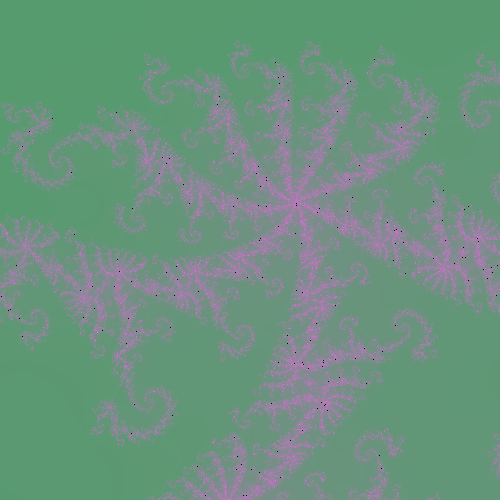

In [301]:
# GenImageBW()
GenImageRGB()